In [ ]:
!pip install tensorflow matplotlib numpy scikit-learn

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/flowers.zip'  # Replace with your actual zip file path

# Define the directory where you want to extract the zip file
extract_dir = '/content/flowers'  # This is where the extracted folder will go

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check for the extracted content
extracted_files = os.listdir(extract_dir)

# Filter out the '__MACOSX' folder and select the 'flowers' directory
flowers_dir = None
for folder in extracted_files:
    if 'flowers' in folder.lower():  # Case-insensitive match for 'flowers' folder
        flowers_dir = os.path.join(extract_dir, folder)
        break

if flowers_dir:
    print(f"Flowers directory path: {flowers_dir}")
else:
    print("Flowers folder not found!")

# Verify the content inside the flowers directory
flowers_files = os.listdir(flowers_dir)

# Remove the '.DS_Store' file from the list, if it exists
flowers_files = [file for file in flowers_files if file != '.DS_Store']

# Print the filtered list of files
print(f"Files in the flowers directory (without .DS_Store): {flowers_files}")

# Now you can use the `flowers_dir` in your code
DIRECTORY = flowers_dir  # Use this variable in your code

Flowers directory path: /content/flowers/flowers
Files in the flowers directory (without .DS_Store): ['sunflower', 'lisianthus', 'rose', 'daisy', 'lilac', 'carnation', 'tulip', 'ranunculus', 'babys-breath', 'peonie', 'gardenia', 'stock', 'hydrangea', 'orchird', 'freesia']


Found 31137 files belonging to 15 classes.
Using 24910 files for training.
Found 31137 files belonging to 15 classes.
Using 6227 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of devices: 1


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ true_divide (TrueDivide)  │ (None, 224, 224, 3)    │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract (Subtract)       │ (None, 224, 224, 3)    │              0 │ true_divide[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mobilenetv2_1.00_224      │ (None, 7, 7, 1280)     │      2,257,984 │ subtract[0][0]         │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 1280)           │              0 │ mobilenetv2_1.00_224[… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 1280)           │              0 │ mobilenetv2_1.00_224[… │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2560)           │              0 │ global_average_poolin… │
│                           │                        │                │ global_max_pooling2d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 2560)           │         10,240 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2560)           │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        655,616 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 15)             │          3,855 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,928,719 (11.17 MB)

 Trainable params: 665,103 (2.54 MB)

 Non-trainable params: 2,263,616 (8.64 MB)

Class Weights:  {0: 1.6962887299965952, 1: 0.8132549787789749, 2: 0.828262676641729, 3: 2.9654761904761906, 4: 1.820906432748538, 5: 0.7877925363693865, 6: 0.8498805868304333, 7: 1.2794042116076014, 8: 0.8278497839813892, 9: 0.8324143692564745, 10: 0.8266135722581716, 11: 1.209516873027434, 12: 0.8164536217633562, 13: 0.948952380952381, 14: 0.8809902740937223}
Epoch 1/9
779/779 ━━━━━━━━━━━━━━━━━━━━ 51s 45ms/step - accuracy: 0.3488 - loss: 2.8797 - val_accuracy: 0.7509 - val_loss: 1.2607 - learning_rate: 1.1000e-04
Epoch 2/9
779/779 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6479 - loss: 1.6109 - val_accuracy: 0.7899 - val_loss: 1.1203 - learning_rate: 1.2100e-04
Epoch 3/9
779/779 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6990 - loss: 1.3987 - val_accuracy: 0.8079 - val_loss: 1.0460 - learning_rate: 1.3310e-04
Epoch 4/9
779/779 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7298 - loss: 1.2768 - val_accuracy: 0.8213 - val_loss: 0.9885 - learning_rate: 1.4641e-04
Epoch 5/9

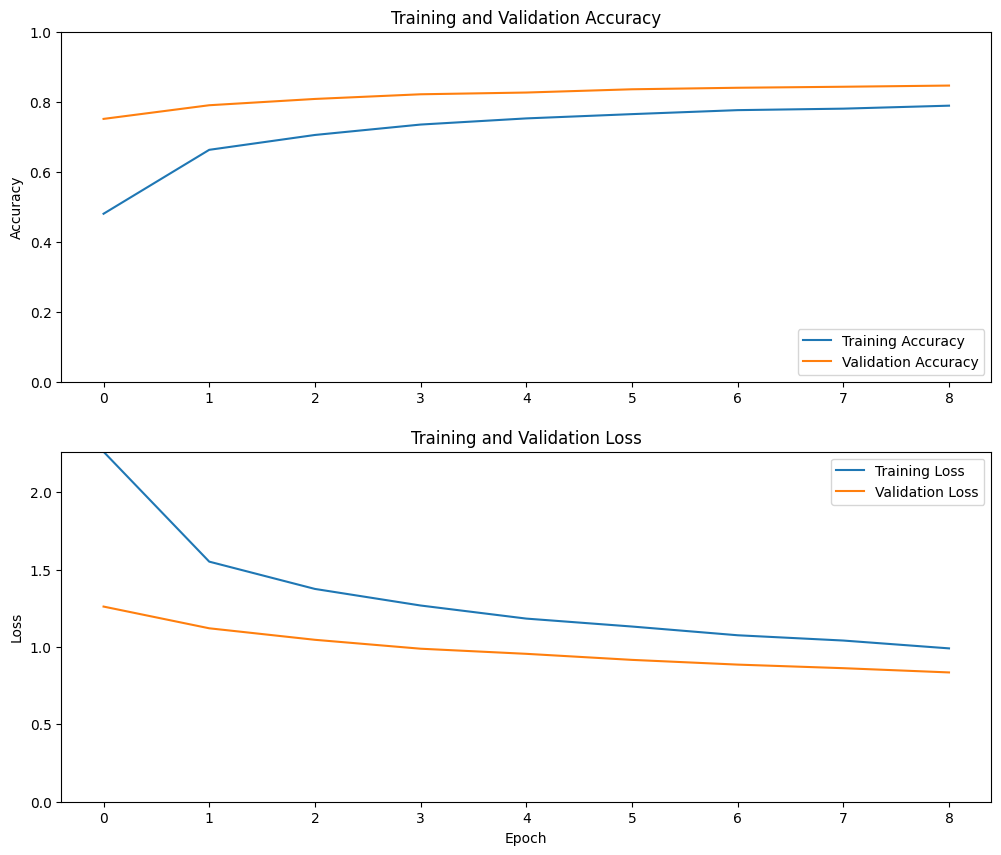

Number of layers in the base model:  154
Epoch 9/14
779/779 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.6746 - loss: 1.3904 - val_accuracy: 0.8384 - val_loss: 0.8546 - learning_rate: 1.0000e-05
Epoch 10/14
779/779 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7622 - loss: 1.0797 - val_accuracy: 0.8468 - val_loss: 0.8124 - learning_rate: 1.0000e-05
Epoch 11/14
779/779 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7927 - loss: 0.9758 - val_accuracy: 0.8540 - val_loss: 0.7831 - learning_rate: 1.0000e-05
Epoch 12/14
779/779 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8173 - loss: 0.8970 - val_accuracy: 0.8654 - val_loss: 0.7505 - learning_rate: 1.0000e-05
Epoch 13/14
779/779 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8306 - loss: 0.8495 - val_accuracy: 0.8712 - val_loss: 0.7288 - learning_rate: 1.0000e-05
Epoch 14/14
779/779 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8438 - loss: 0.8050 - val_accuracy: 0.8796 - val_loss: 0.7092 - learning_rate: 1.0000e-05
Restor

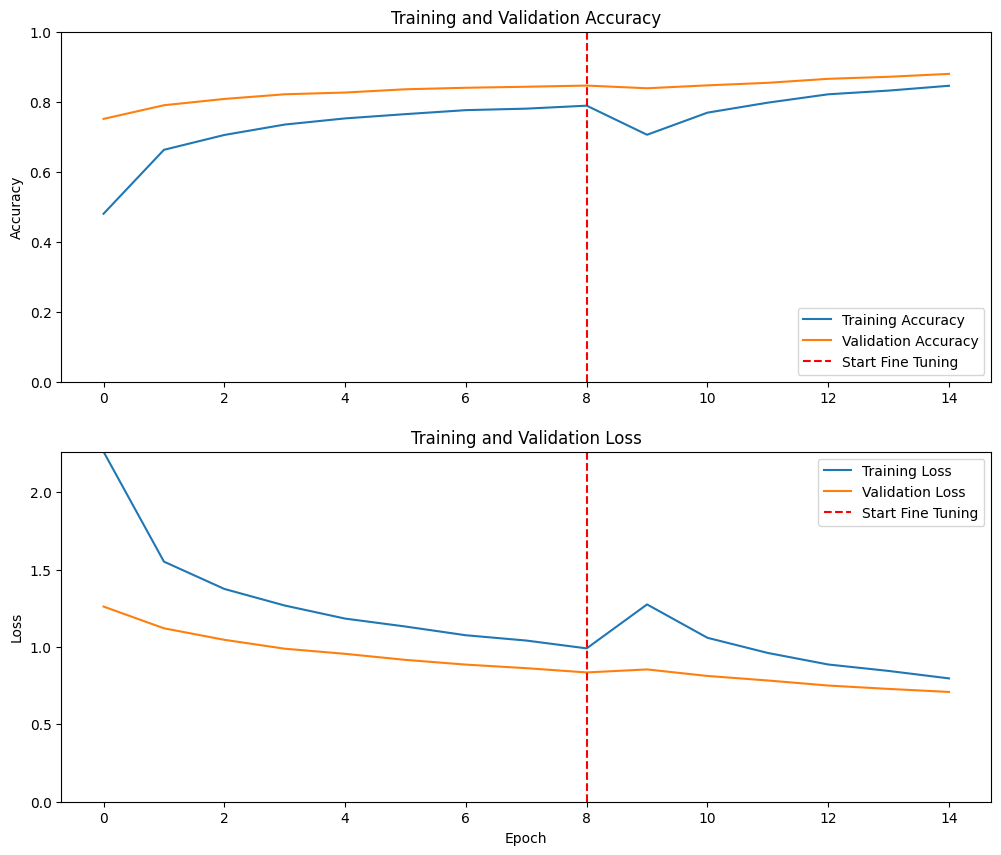

195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8826 - loss: 0.7022
Validation Loss: 0.7092
Validation Accuracy: 0.8796


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [ ]:
# Multi-Class Classification with MobileNetV2 for Flower Classification

# 1. Import Necessary Packages
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import (
    RandomFlip, RandomRotation, RandomZoom, RandomTranslation,
    RandomContrast, RandomBrightness, BatchNormalization, GlobalMaxPooling2D, Concatenate
)
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, TensorBoard, LearningRateScheduler
)
from tensorflow.keras import mixed_precision
from sklearn.utils import class_weight

# 2. Define Constants and Parameters
BATCH_SIZE = 32  # Reduced batch size for better generalization
IMG_SIZE = (224, 224)  # Increased image size for better feature representation
IMG_SHAPE = IMG_SIZE + (3,)
DIRECTORY = "/content/flowers/flowers"  # Replace with your dataset directory path
BASE_LEARNING_RATE = 0.001  # Base learning rate
INITIAL_EPOCHS = 9
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS
FINE_TUNE_AT = 100  # Adjusted for finer control during fine-tuning
NUM_CLASSES = 15     # Number of classes

# 3. Enable Mixed Precision
mixed_precision.set_global_policy('mixed_float16')

# 4. Create Training and Validation Datasets
train_dataset = image_dataset_from_directory(
    DIRECTORY,
    validation_split=0.2,
    subset='training',
    seed=42,
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True  # Ensure shuffling
)

validation_dataset = image_dataset_from_directory(
    DIRECTORY,
    validation_split=0.2,
    subset='validation',
    seed=42,
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# 5. Optimize Data Pipeline with Caching and Prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 6. Define Enhanced Data Augmentation
def data_augmenter():
    data_augmentation = tf.keras.Sequential([
        RandomFlip("horizontal"),
        RandomFlip("vertical"),
    ])
    return data_augmentation

augmenter = data_augmenter()

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze the base model initially

# 8. Build the Model
def multiclass_flower_model(image_shape=IMG_SIZE, data_augmentation=augmenter, num_classes=NUM_CLASSES):
    inputs = tf.keras.Input(shape=image_shape + (3,))
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)

    # Apply both pooling layers independently to the same tensor for more diverse feature extraction
    gap = tf.keras.layers.GlobalAveragePooling2D()(x)
    gmp = tf.keras.layers.GlobalMaxPooling2D()(x)

    # Concatenate the outputs of both pooling layers
    x = Concatenate()([gap, gmp])

    x = BatchNormalization()(x)  # Added Batch Normalization
    x = tfl.Dropout(0.5)(x)  # Increased dropout rate
    x = tfl.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)  # Increased Dense units
    x = BatchNormalization()(x)  # Added Batch Normalization
    x = tfl.Dropout(0.5)(x)  # Additional dropout
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax', dtype='float32')(x)  # Set dtype to float32 for numerical stability
    model = tf.keras.Model(inputs, outputs)
    return model

# 9. Define Distributed Strategy (Optional)
strategy = tf.distribute.get_strategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

with strategy.scope():
    model = multiclass_flower_model(IMG_SIZE, augmenter, NUM_CLASSES)
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        optimizer=tf.keras.optimizers.Adam(learning_rate=BASE_LEARNING_RATE * 0.1),
        metrics=['accuracy']
    )

model.summary()

# 10. Define Callbacks for Early Stopping, Learning Rate Reduction, TensorBoard, and Warm-Up
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Increased patience
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,  # Increased patience
    min_lr=1e-6,
    verbose=1
)

tensorboard_callback = TensorBoard(log_dir='logs/', histogram_freq=1)

def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr * 1.1  # Warm-up for first 5 epochs
    else:
        return lr

warmup_lr = LearningRateScheduler(lr_scheduler)

callbacks = [early_stopping, reduce_lr, tensorboard_callback, warmup_lr]

# 11. Compute Class Weights
# Flatten the dataset labels
train_labels = np.concatenate([y for x, y in train_dataset], axis=0)
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_values))
print("Class Weights: ", class_weights)

# 12. Train the Model with Callbacks and Class Weights
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=INITIAL_EPOCHS,
    callbacks=callbacks,
    class_weight=class_weights  # Added class weights
)

# 13. Plot Training and Validation Metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 10))

# Accuracy Plot
plt.subplot(2, 1, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(2, 1, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0, max(max(loss), max(val_loss))])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

# 14. Fine-Tuning the Model
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

# Freeze the first FINE_TUNE_AT layers
for layer in base_model.layers[:FINE_TUNE_AT]:
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
with strategy.scope():
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        optimizer=tf.keras.optimizers.Adam(learning_rate=BASE_LEARNING_RATE * 0.01),
        metrics=['accuracy']
    )

# Continue Training (Fine-Tuning) with Callbacks
history_fine = model.fit(
    train_dataset,
    epochs=TOTAL_EPOCHS,
    initial_epoch=history.epoch[-1],
    validation_data=validation_dataset,
    callbacks=callbacks,
    class_weight=class_weights
)

# Update the accuracy and loss values
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

# 15. Plot Training and Validation Metrics After Fine-Tuning
plt.figure(figsize=(12, 10))

# Accuracy Plot
plt.subplot(2, 1, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.axvline(x=INITIAL_EPOCHS-1, color='r', linestyle='--', label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(2, 1, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.axvline(x=INITIAL_EPOCHS-1, color='r', linestyle='--', label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0, max(max(loss), max(val_loss))])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

# 16. Save the Model (Optional)
model.save('flower_classifier_model_enhanced.keras')

# 17. Evaluate the Model on Validation Data
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# 18. Make Predictions (Optional)
# Define class names (ensure this matches your dataset)
class_names = train_dataset.class_names

# Example of making predictions on a batch
image_batch, label_batch = next(iter(validation_dataset))
predictions = model.predict(image_batch)  # Shape: (batch_size, NUM_CLASSES)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(len(predicted_classes)):
    true_label = class_names[label_batch[i]]
    predicted_label = class_names[predicted_classes[i]]
    probability = predictions[i][predicted_classes[i]]
    print(f"Image {i+1}: True Label: {true_label} | Predicted: {predicted_label} (Probability: {probability:.4f})")

Class Names: ['babys-breath', 'carnation', 'daisy', 'freesia', 'gardenia', 'hydrangea', 'lilac', 'lisianthus', 'orchird', 'peonie', 'ranunculus', 'rose', 'stock', 'sunflower', 'tulip']
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8826 - loss: 0.7022
Validation Loss: 0.7092
Validation Accuracy: 0.8796
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━

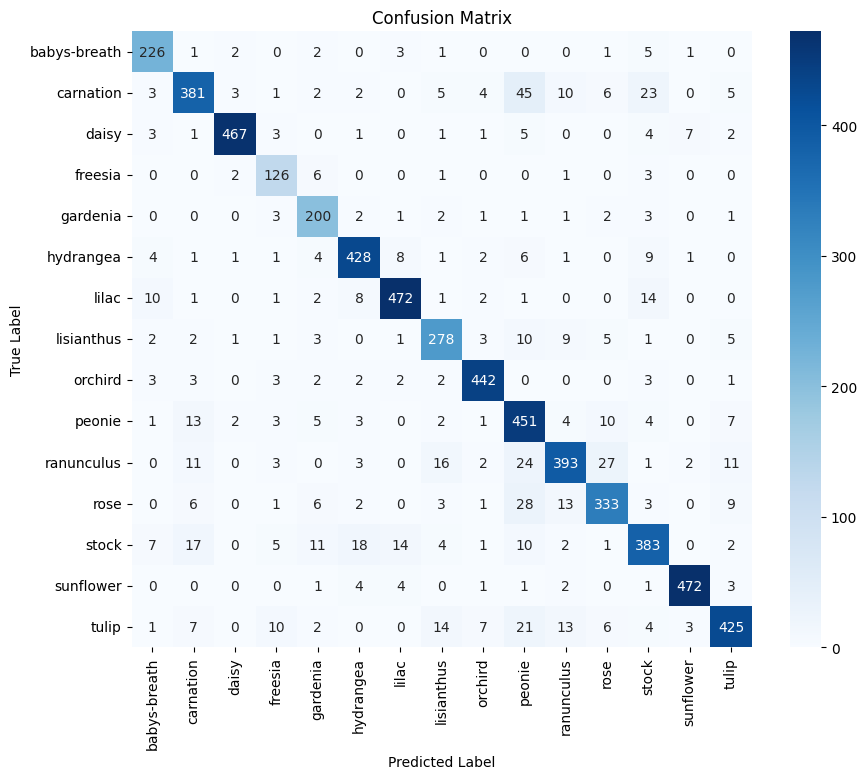

In [ ]:
# Testing the Saved Model for Flower Classification

# 1. Import necessary packages
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import os

# 2. Load the saved model
model = tf.keras.models.load_model('flower_classifier_model_enhanced.keras')

# 3. Get the class names from the dataset directory, excluding '.DS_Store'
# Replace DIRECTORY with the path to your dataset
class_names = sorted([name for name in os.listdir(DIRECTORY) if name != ".DS_Store"])
print(f"Class Names: {class_names}")

# 4. Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# 5. Generate predictions on the validation dataset
y_true = []
y_pred = []

for image_batch, label_batch in validation_dataset:
    predictions = model.predict(image_batch)
    predicted_classes = np.argmax(predictions, axis=1)

    y_true.extend(label_batch.numpy())
    y_pred.extend(predicted_classes)

# 6. Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0
